In [1]:
import os
from zipfile import ZipFile
from six.moves import urllib

In [2]:
# DOWNLOAD_ROOT = "https://github.com/noxtoby/TADPOLE/master/"
TADPOLE_PATH = os.path.join("..", "data")

# TADPOLE_URL = DOWNLOAD_ROOT + "files"



Download the zipfile from: https://ida.loni.usc.edu/pages/access/studyData.jsp?categoryId=43&subCategoryId=94

In [3]:
def fetch_tadpole_data(tadpole_path=TADPOLE_PATH):
    if not os.path.isdir(tadpole_path):
        os.makedirs(tadpole_path)
    zip_path = os.path.join(tadpole_path, "tadpole_challenge.zip")
    print(zip_path)
#     urllib.request.urlretrieve(tadpole_url, zip_path)
    with ZipFile(zip_path) as tadpole_zip:

        tadpole_zip.extractall(path=tadpole_path)
        tadpole_zip.close()

In [ ]:
fetch_tadpole_data()

In [4]:
import pandas as pd

In [5]:
def load_tadpole_data(tadpole_path=TADPOLE_PATH):
    csv_path_d1_d2 = os.path.join(tadpole_path, "TADPOLE_D1_D2.csv")
    csv_path_d3 = os.path.join(tadpole_path, "TADPOLE_D3.csv")
    return pd.read_csv(csv_path_d1_d2), pd.read_csv(csv_path_d3)



In [6]:
tadpole_d1_d2, tadpole_d3 = load_tadpole_data()

/Users/frankkelly/Projects/cardiff-py-data-con/pycon-env/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (471,473,474,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,569,570,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,599,601,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,624,625,626,627,628,629,630,631,632,633,634,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,7

## D1: TADPOLE Standard training set.

The Standard training set (D1) was created from the ADNIMERGE spreadsheet, to which we added additional MRI, PET (FDG, AV45 and AV1451), DTI and CSF biomarkers.

The MRI biomarkers we added consist of FreeSurfer longitudinally processed ROIs from UCSFFSL tables. The exact spreadsheets used were UCSFFSL_02_01_16.csv and UCSFFSL51ALL_08_01_16.csv. Duplicate rows were removed by retaining the row with the most recent RUNDATE and IMAGEUID.
 
We also included the following types of PET ROI-based biomarkers: FDG, AV45 and AV1451. The spreadsheets used were: BAIPETNMRC_09_12_16.csv, UCBERKELEYAV45_10_17_16.csv and UCBERKELEYAV1451_10_17_16.csv.
 
### TADPOLE flowchart
The DTI biomarkers added represent ROI summary measures (e.g. mean diffusivity MD, axial diffusivity AD) taken from the spreadsheet DTIROI_04_30_14.csv.
 
We also included three CSF biomarkers: Amyloid-beta, Tau and P-Tau. These values were taken from the Elecsys analysis, which can be found in the UPENNBIOMK9_04_19_17.csv spreadsheet.
 
We matched the subjects between ADNIMERGE and these spreadsheets using the subject ID and visit code. Duplicate rows were removed, with the most recent preferred (). For each modality we also included the ID of the image that was used to derive these summary measures.



## D2: TADPOLE Standard prediction set.

All currently available longitudinal data for prospective ADNI3 participants (rollovers from ADNI2). That is, active participants with ADNI2 visits. These participants were identified using the script TADPOLE_D2.m.

In [7]:
tadpole_d1_d2.head()

,RID,PTID,VISCODE,SITE,D1,D2,COLPROT,ORIGPROT,EXAMDATE,DX_bl,...,PHASE_UPENNBIOMK9_04_19_17,BATCH_UPENNBIOMK9_04_19_17,KIT_UPENNBIOMK9_04_19_17,STDS_UPENNBIOMK9_04_19_17,RUNDATE_UPENNBIOMK9_04_19_17,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,COMMENT_UPENNBIOMK9_04_19_17,update_stamp_UPENNBIOMK9_04_19_17
0,2,011_S_0002,bl,11,1,1,ADNI1,ADNI1,2005-09-08,CN,...,,,,,,,,,,
1,3,011_S_0003,bl,11,1,0,ADNI1,ADNI1,2005-09-12,AD,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-14,741.5,239.7,22.83,NaN,2017-04-20 14:39:54.0
2,3,011_S_0003,m06,11,1,0,ADNI1,ADNI1,2006-03-13,AD,...,,,,,,,,,,
3,3,011_S_0003,m12,11,1,0,ADNI1,ADNI1,2006-09-12,AD,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-14,601.4,251.7,24.18,NaN,2017-04-20 14:39:54.0
4,3,011_S_0003,m24,11,1,0,ADNI1,ADNI1,2007-09-12,AD,...,,,,,,,,,,


In [8]:
print(list(tadpole_d1_d2.columns)[:30])

['RID', 'PTID', 'VISCODE', 'SITE', 'D1', 'D2', 'COLPROT', 'ORIGPROT', 'EXAMDATE', 'DX_bl', 'DXCHANGE', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4', 'FDG', 'PIB', 'AV45', 'CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'FAQ']


In [9]:
tadpole_d1_d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Columns: 1907 entries, RID to update_stamp_UPENNBIOMK9_04_19_17
dtypes: float64(72), int64(8), object(1827)
memory usage: 185.4+ MB


In [10]:
tadpole_d1_d2["DX"].value_counts()

MCI                3932
NL                 2668
Dementia           1732
MCI to Dementia     372
NL to MCI           108
MCI to NL            77
Dementia to MCI      12
NL to Dementia        3
Name: DX, dtype: int64

In [11]:
tadpole_d1_d2["DX_bl"].value_counts()

LMCI    4644
CN      3821
EMCI    2319
AD      1568
SMC      389
Name: DX_bl, dtype: int64

In [12]:
tadpole_d1_d2["VISCODE"].value_counts()

bl      1737
m06     1618
m12     1485
m24     1326
m18     1293
m36      853
m03      793
m30      750
m48      659
m60      354
m42      307
m72      255
m66      217
m78      213
m54      200
m84      199
m96      155
m90      129
m108     119
m120      71
m102       7
m114       1
Name: VISCODE, dtype: int64

In [13]:
print(tadpole_d1_d2.shape)
tadpole_d1_d2.describe()

(12741, 1907)


,RID,SITE,D1,D2,DXCHANGE,AGE,PTEDUCAT,APOE4,FDG,PIB,...,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M
count,12741.000000,12741.000000,12741.000000,12741.000000,8892.000000,12741.000000,12741.000000,12729.000000,3352.000000,223.000000,...,5504.000000,5637.000000,5767.000000,9132.000000,146.000000,5750.000000,12741.000000,12741.000000,12741.000000,12741.000000
mean,2240.325720,73.273448,0.994506,0.601209,2.097503,73.814865,15.988384,0.537277,1.208239,1.783161,...,1.651214,1.845027,1.693177,1.246721,1.592551,1.202087,2.181701,26.126760,26.047328,25.859901
std,1855.269911,107.684559,0.073921,0.489669,1.086541,6.973068,2.829707,0.655835,0.160831,0.422511,...,0.838895,0.894895,0.700158,0.145614,0.306818,0.222027,2.187334,26.194216,26.154436,25.945824
min,2.000000,2.000000,0.000000,0.000000,1.000000,54.400000,4.000000,0.000000,0.636804,1.095000,...,1.000000,1.000000,1.000000,0.697264,1.155000,0.838537,0.000000,0.000000,0.000000,0.000000
25%,618.000000,22.000000,1.000000,0.000000,1.000000,69.600000,14.000000,0.000000,1.109722,1.361250,...,1.000000,1.000000,1.153850,1.157670,1.360000,1.019440,0.498289,5.967210,6.000000,6.000000
50%,1280.000000,41.000000,1.000000,1.000000,2.000000,73.800000,16.000000,0.000000,1.219805,1.850000,...,1.250000,1.500000,1.435900,1.253490,1.490000,1.125370,1.516770,18.163900,18.000000,18.000000
75%,4328.000000,116.000000,1.000000,1.000000,3.000000,78.700000,18.000000,1.000000,1.314253,2.127500,...,2.000000,2.333330,2.051280,1.338750,1.835000,1.374980,3.030800,36.295100,36.000000,36.000000
max,5296.000000,941.000000,1.000000,1.000000,8.000000,91.400000,20.000000,2.000000,1.753320,2.927500,...,4.000000,4.000000,3.948720,1.707170,2.282500,2.025560,10.751500,128.754000,126.000000,120.000000


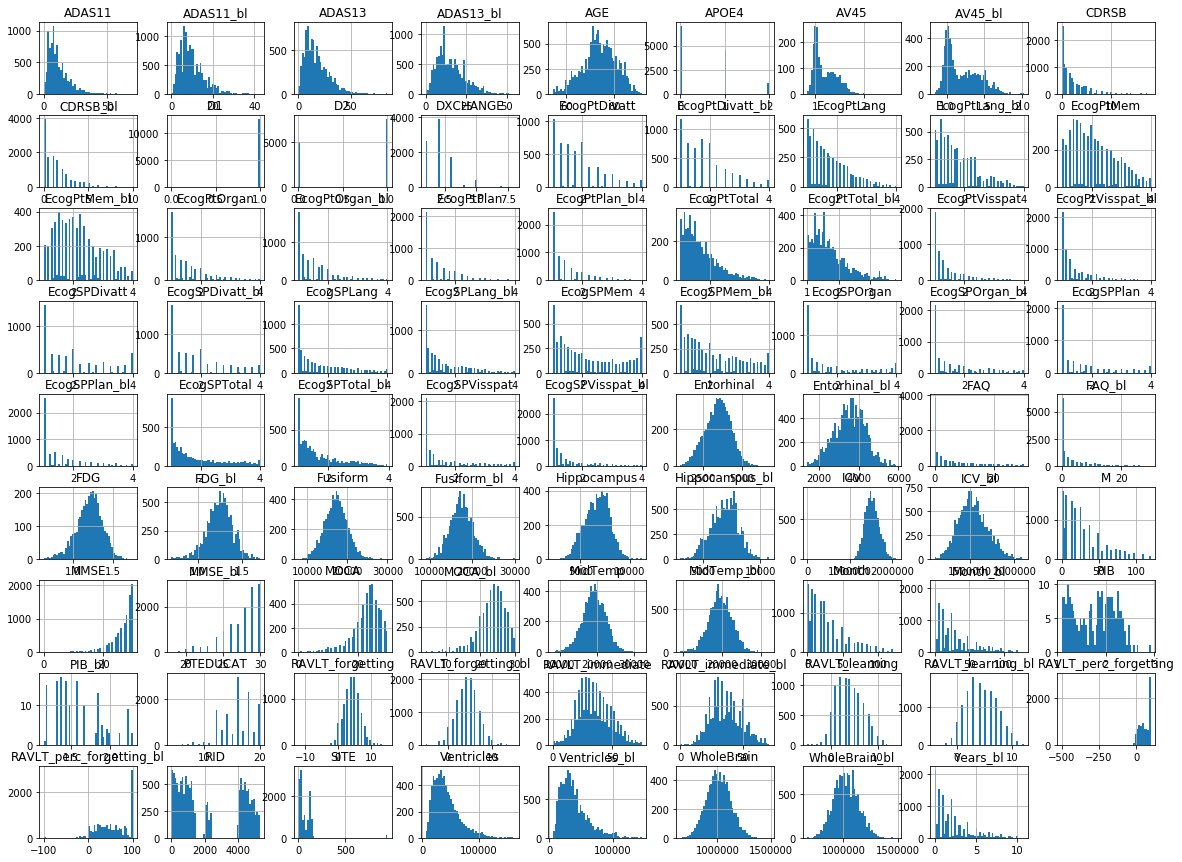

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
tadpole_d1_d2.hist(bins=50, figsize=(20,15))
plt.show()

## D3. TADPOLE Cross-sectional prediction set.

For each participant in D2, the final visit only and a limited number of data columns to mimic screening data for a clinical trial: demographics, cognitive test scores, and structural MRI (derived brain volumes). These participants were identified using the script TADPOLE_D2.m, and the spreadsheet TADPOLE_D3.cv was assembled using the script TADPOLE_D3.m.


In [15]:
print(tadpole_d3.shape)
tadpole_d3.head()

(896, 383)


,RID,VISCODE,EXAMDATE,DX,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,...,ST97TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98CV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98SA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99CV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99SA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST9SV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16
0,295,m72,2012-05-10,NL,84.8,Male,18,Not Hisp/Latino,White,Married,...,0.550,4500.0,1846.0,2.236,0.694,9976.0,3004.0,2.712,0.650,2240.0
1,257,m96,2014-07-30,NL,78.5,Female,6,Not Hisp/Latino,White,Never married,...,0.540,3757.0,1631.0,2.210,0.882,7191.0,2466.0,2.475,0.649,1415.0
2,4066,bl,2011-06-22,NL,78.7,Female,18,Not Hisp/Latino,White,Married,...,0.587,4850.0,1790.0,2.325,0.911,8688.0,2663.0,2.761,0.563,1813.0
3,4186,bl,2011-09-06,MCI,74.4,Male,12,Not Hisp/Latino,White,Married,...,0.631,5184.0,2090.0,2.198,0.703,10995.0,3165.0,2.866,0.696,1392.0
4,4251,m06,2012-04-17,MCI,71.9,Male,19,Not Hisp/Latino,White,Married,...,0.639,4690.0,1851.0,2.289,0.692,10884.0,3204.0,2.795,0.681,2568.0


In [16]:
print(list(tadpole_d3.columns)[:20])

['RID', 'VISCODE', 'EXAMDATE', 'DX', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'COLPROT', 'ADAS13', 'MMSE', 'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV']


In [24]:
tadpole_d3.PTMARRY.value_counts()

Married          662
Widowed          102
Divorced          94
Never married     33
Unknown            5
Name: PTMARRY, dtype: int64

In [25]:
tadpole_d3.DX.value_counts()

NL                 292
MCI                250
Dementia           106
MCI to Dementia     30
NL to MCI           16
MCI to NL            7
Dementia to MCI      3
Name: DX, dtype: int64

In [26]:
tadpole_d3.PTETHCAT.value_counts()

Not Hisp/Latino    859
Hisp/Latino         32
Unknown              5
Name: PTETHCAT, dtype: int64

In [27]:
tadpole_d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Columns: 383 entries, RID to ST9SV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16
dtypes: float64(360), int64(2), object(21)
memory usage: 2.6+ MB


In [28]:
tadpole_d3.describe()

,RID,AGE,PTEDUCAT,ADAS13,MMSE,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,...,ST97TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98CV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98SA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99CV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99SA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST9SV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16
count,896.000000,896.000000,896.000000,747.000000,753.000000,187.000000,219.000000,2.000000e+02,171.000000,171.000000,...,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,3521.056920,72.710491,16.247768,15.824632,26.868526,38990.026738,6889.652968,1.025986e+06,3614.035088,18013.198830,...,0.611692,4601.339286,1731.700893,2.330821,0.793549,10344.348214,3117.098214,2.731246,0.689183,2167.227679
std,1700.963026,6.857007,2.619863,13.031928,4.277599,22167.823359,1253.625644,1.058273e+05,734.138782,2693.457984,...,0.057025,610.543565,209.286670,0.198907,0.114854,1591.437361,380.831906,0.236896,0.083405,649.598598
min,2.000000,55.000000,6.000000,0.000000,0.000000,8823.000000,2219.000000,7.349730e+05,1264.000000,10638.000000,...,0.447000,2839.000000,1190.000000,1.704000,0.578000,4950.000000,2309.000000,1.719000,0.519000,634.000000
25%,2161.750000,68.000000,14.000000,7.000000,26.000000,21656.500000,6264.000000,9.610590e+05,3132.000000,16495.000000,...,0.568750,4222.250000,1599.000000,2.182000,0.702500,9422.000000,2853.000000,2.620000,0.633000,1730.750000
50%,4312.500000,72.700000,16.000000,12.000000,28.000000,34849.000000,7009.000000,1.020295e+06,3599.000000,18175.000000,...,0.613000,4548.000000,1712.500000,2.317500,0.782000,10233.000000,3092.500000,2.749500,0.679500,2049.000000
75%,4767.500000,77.325000,18.000000,20.000000,30.000000,51424.000000,7685.000000,1.090150e+06,4083.000000,19910.000000,...,0.651000,4909.000000,1856.250000,2.482250,0.867000,11265.000000,3350.500000,2.885000,0.742250,2446.000000
max,5296.000000,90.300000,20.000000,85.000000,30.000000,113234.000000,11068.000000,1.307800e+06,5272.000000,28510.000000,...,0.741000,6602.000000,2319.000000,2.807000,1.092000,15598.000000,4174.000000,3.253000,0.904000,4926.000000


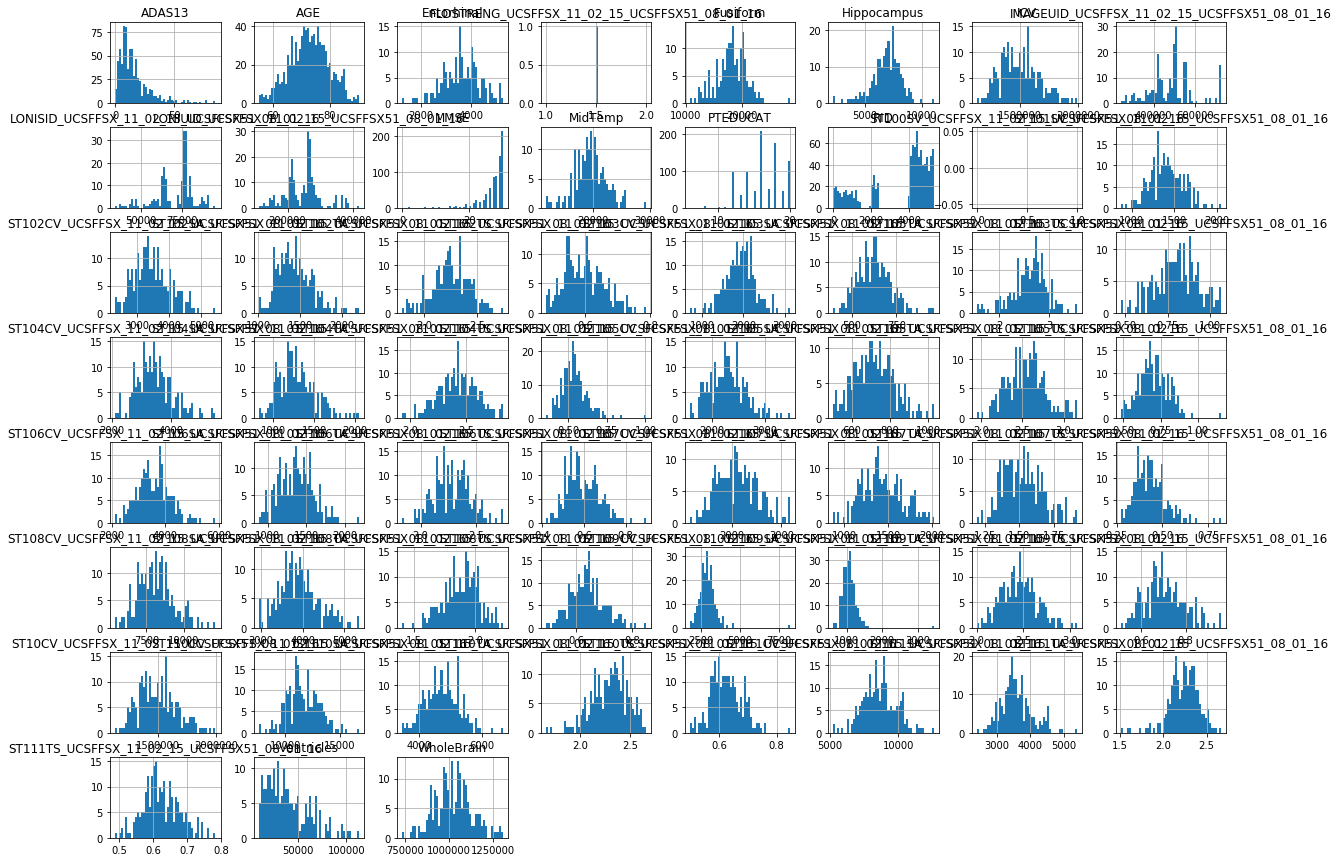

In [29]:
tadpole_d3.iloc[:, :80].hist(bins=50, figsize=(20,15))
plt.show()

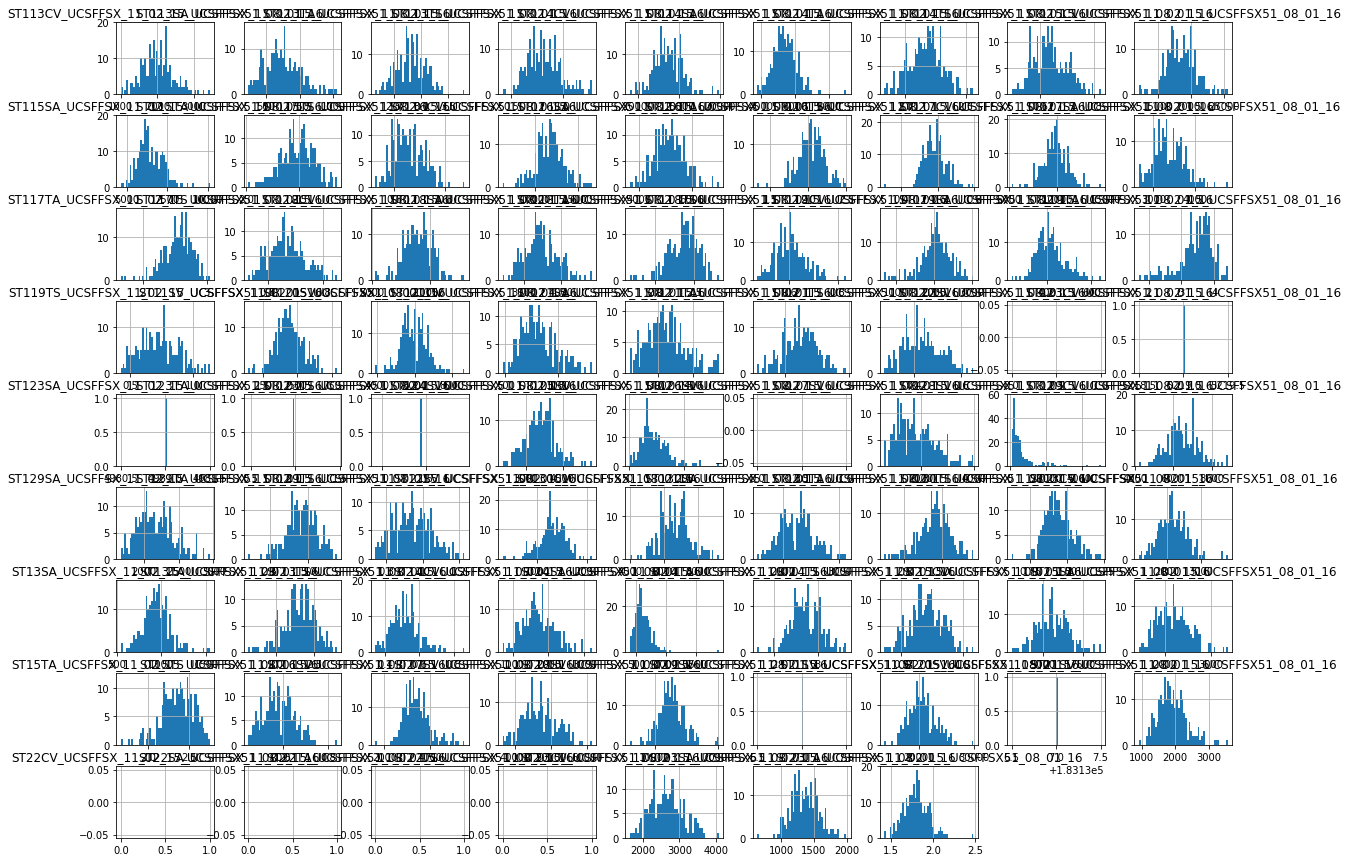

In [23]:
tadpole_d3.iloc[:, 81:160].hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
tadpole_d3.iloc[:, 161:240].hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
tadpole_d3.iloc[:, 241:320].hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
tadpole_d3.iloc[:, 321:].hist(bins=50, figsize=(20,15))
plt.show()

In [67]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [73]:
# tadpole_d1_d2_with_id = tadpole_d1_d2.reset_index()
train_set_d3, test_set_d3 = split_train_test_by_id(tadpole_d3, 0.2, "RID")
print(len(train_set_d3), "train +", len(test_set_d3), "test")

703 train + 193 test


## Perform stratified shuffle split of data 

(to avoid over sampling one marital status or gender)

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

In [61]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index \
in split.split(tadpole_d3, tadpole_d3[["PTMARRY", "PTGENDER"]]):
    strat_train_set = tadpole_d3.loc[train_index]
    strat_test_set = tadpole_d3.loc[test_index]

In [70]:
strat_train_set.PTETHCAT.value_counts()

Not Hisp/Latino    682
Hisp/Latino         29
Unknown              5
Name: PTETHCAT, dtype: int64

In [63]:
chosen_metric = "PTETHCAT"

print(tadpole_d3[chosen_metric].value_counts() / len(tadpole_d3))
print(strat_train_set[chosen_metric].value_counts() / len(strat_train_set))
print(strat_test_set[chosen_metric].value_counts() / len(strat_test_set))

Not Hisp/Latino    0.958705
Hisp/Latino        0.035714
Unknown            0.005580
Name: PTETHCAT, dtype: float64
Not Hisp/Latino    0.952514
Hisp/Latino        0.040503
Unknown            0.006983
Name: PTETHCAT, dtype: float64
Not Hisp/Latino    0.983333
Hisp/Latino        0.016667
Name: PTETHCAT, dtype: float64


In [64]:
tadpole = strat_train_set.copy()

## Look for correlations

In [68]:
corr_matrix = tadpole.corr()

In [72]:
corr_matrix['ADAS13'].sort_values(ascending=False)

ADAS13                                         1.000000
ST30SV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16     0.604988
ST89SV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16     0.488256
ST37SV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16     0.445247
ST96SV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16     0.422746
Ventricles                                     0.396751
ST21SV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16     0.365113
ST80SV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16     0.336679
ST69SV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16     0.329630
ST45TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16     0.327041
ST127SV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    0.315407
ST104TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    0.306073
ST68SV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16     0.299356
ST54TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16     0.295591
ST7SV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16      0.294718
ST117TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    0.292475
ST113TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    0.292126
ST128SV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    0

In [73]:
from pandas.plotting import scatter_matrix

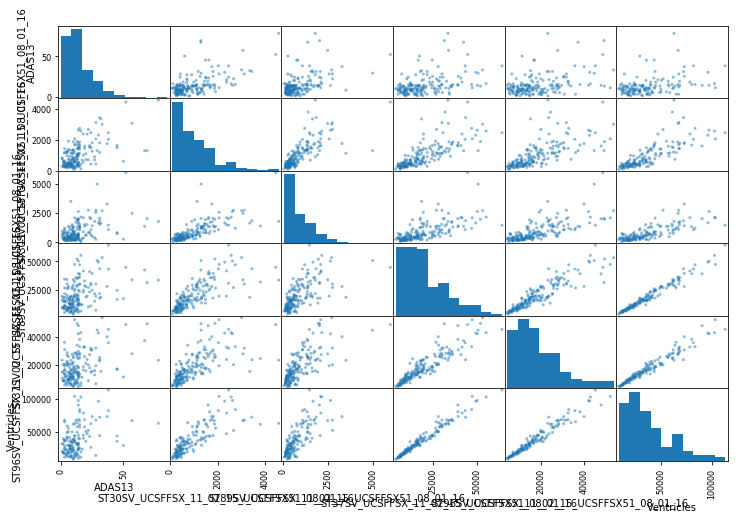

In [75]:
attributes = ["ADAS13", \
              "ST30SV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16", \
              "ST89SV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16",\
              "ST37SV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16",\
              "ST96SV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16", \
              "Ventricles"
             ]
scatter_matrix(tadpole[attributes], figsize=(12,8))
plt.show()

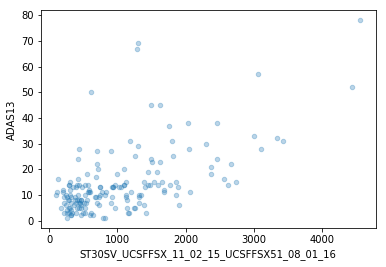

In [78]:
tadpole.plot(kind="scatter", \
             x="ST30SV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16", y="ADAS13", \
             alpha=0.3)

plt.show()

## Prepare the data for the ML algorithm
basic datasets: remove IDs and labels from X, prepare y

In [81]:
tadpole = strat_train_set.drop(["ADAS13", "DX", "RID"], axis=1)
tadpole_labels_categorical = strat_train_set["DX"].copy()
tadpole_labels_continuous = strat_train_set["ADAS13"].copy()

fill in blank values

In [82]:
from sklearn.preprocessing import Imputer

In [102]:
imputer = Imputer(strategy="median")
tadpole_num = tadpole[corr_matrix.drop(["RID", "ADAS13"], axis=1).columns]

tadpole_num.head()

,AGE,PTEDUCAT,MMSE,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,...,ST97TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98CV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98SA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99CV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99SA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST9SV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16
412,83.7,18,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
573,69.8,12,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488,68.0,13,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,73.5,20,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,74.3,20,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
imputer.fit(tadpole_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [120]:
# np.shape(tadpole_num.dropna())

(0, 360)

In [104]:
imputer.statistics_ # median of each attribute

array([  7.26000000e+01,   1.60000000e+01,   2.80000000e+01,
         3.23260000e+04,   7.04700000e+03,   1.03813000e+06,
         3.60900000e+03,   1.82430000e+04,   1.97205000e+04,
         1.50017500e+06,   7.59595000e+04,   1.50000000e+00,
         2.59821000e+05,   4.98052000e+05,              nan,
         1.41500000e+03,   3.38850000e+03,   1.42150000e+03,
         2.24250000e+00,   5.83500000e-01,   1.92400000e+03,
         6.28000000e+02,   2.68600000e+00,   8.07500000e-01,
         3.43650000e+03,   1.26950000e+03,   2.42700000e+00,
         5.29500000e-01,   2.30150000e+03,   7.13500000e+02,
         2.55900000e+00,   6.93500000e-01,   3.54800000e+03,
         1.37350000e+03,   2.28050000e+00,   5.74500000e-01,
         2.11950000e+03,   1.44300000e+03,   1.49800000e+00,
         4.22500000e-01,   8.13400000e+03,   3.88550000e+03,
         1.89650000e+00,   6.40000000e-01,   2.86050000e+03,
         1.06250000e+03,   2.45450000e+00,   6.91500000e-01,
         1.50017500e+06,

In [147]:
import numpy as np
X = imputer.transform(tadpole_num)
print(X.shape)

(716, 342)


In [152]:
non_null_column_index = ~(pd.Series(imputer.statistics_).isnull().values)
print(np.shape(tadpole_num.loc[:, non_null_column_index]))

(716, 342)


In [154]:
tadpole_tr = pd.DataFrame(X, columns=tadpole_num.loc[:, non_null_column_index].columns)

tadpole_tr.head()

,AGE,PTEDUCAT,MMSE,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,...,ST97TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98CV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98SA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99CV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99SA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST9SV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16
0,83.7,18.0,30.0,32326.0,7047.0,1038130.0,3609.0,18243.0,19720.5,1500175.0,...,0.61,4585.0,1728.0,2.3195,0.775,10221.5,3101.5,2.7515,0.6785,2062.5
1,69.8,12.0,30.0,32326.0,7047.0,1038130.0,3609.0,18243.0,19720.5,1500175.0,...,0.61,4585.0,1728.0,2.3195,0.775,10221.5,3101.5,2.7515,0.6785,2062.5
2,68.0,13.0,15.0,32326.0,7047.0,1038130.0,3609.0,18243.0,19720.5,1500175.0,...,0.61,4585.0,1728.0,2.3195,0.775,10221.5,3101.5,2.7515,0.6785,2062.5
3,73.5,20.0,30.0,32326.0,7047.0,1038130.0,3609.0,18243.0,19720.5,1500175.0,...,0.61,4585.0,1728.0,2.3195,0.775,10221.5,3101.5,2.7515,0.6785,2062.5
4,74.3,20.0,25.0,32326.0,7047.0,1038130.0,3609.0,18243.0,19720.5,1500175.0,...,0.61,4585.0,1728.0,2.3195,0.775,10221.5,3101.5,2.7515,0.6785,2062.5


Deal with categorical variables

In [166]:
num_cols = tadpole._get_numeric_data().columns
cat_cols = list(set(tadpole.columns) - set(num_cols))
cat_cols

['VERSION_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'PTRACCAT',
 'STATUS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'OVERALLQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'VISCODE',
 'EXAMDATE_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'INSULAQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'PARQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'PTETHCAT',
 'PTMARRY',
 'PTGENDER',
 'OCCQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'EXAMDATE',
 'CWMQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'FRONTQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'RUNDATE_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'BGQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'TEMPQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'COLPROT',
 'VENTQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16']

In [156]:
from sklearn.preprocessing import LabelEncoder

In [179]:
tadpole.loc[:, cat_cols].dropna(axis=1)

,PTRACCAT,VISCODE,PTETHCAT,PTMARRY,PTGENDER,EXAMDATE,COLPROT
412,White,m36,Not Hisp/Latino,Divorced,Female,2015-08-17,ADNI2
573,White,m48,Not Hisp/Latino,Widowed,Female,2016-02-09,ADNI2
488,White,m60,Not Hisp/Latino,Married,Male,2015-12-14,ADNI2
393,White,m48,Not Hisp/Latino,Married,Male,2015-12-03,ADNI2
219,White,m36,Not Hisp/Latino,Married,Male,2015-02-10,ADNI2
167,Black,m84,Not Hisp/Latino,Married,Female,2014-05-16,ADNI2
85,White,m24,Not Hisp/Latino,Married,Female,2014-01-07,ADNI2
859,More than one,m54,Not Hisp/Latino,Married,Male,2016-11-08,ADNI2
442,White,m24,Not Hisp/Latino,Married,Female,2015-08-21,ADNI2
618,White,m120,Not Hisp/Latino,Widowed,Female,2016-03-02,ADNI2


In [182]:
encoder = LabelEncoder()


tadpole_cat = tadpole.loc[:, cat_cols].dropna(axis=1)
tadpole_cat_encoded = tadpole_cat.apply(encoder.fit_transform)



# encoder.fit_transform(tadpole_cat)

In [183]:
tadpole_cat_encoded

,PTRACCAT,VISCODE,PTETHCAT,PTMARRY,PTGENDER,EXAMDATE,COLPROT
412,6,10,1,0,0,206,0
573,6,12,1,4,0,299,0
488,6,14,1,1,1,272,0
393,6,12,1,1,1,265,0
219,6,10,1,1,1,144,0
167,2,18,1,1,0,110,0
85,6,8,1,1,0,69,0
859,4,13,1,1,1,423,0
442,6,8,1,1,0,210,0
618,6,6,1,4,0,313,0


In [155]:
from sklearn.preprocessing import OneHotEncoder

['VERSION_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'PTRACCAT',
 'STATUS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'OVERALLQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'VISCODE',
 'EXAMDATE_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'INSULAQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'PARQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'PTETHCAT',
 'PTMARRY',
 'PTGENDER',
 'OCCQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'EXAMDATE',
 'CWMQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'FRONTQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'RUNDATE_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'BGQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'TEMPQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'COLPROT',
 'VENTQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16']

In [ ]:
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))